In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np


In [2]:
Z=np.array([22,29,30,40,26,28,42,47])
#k_Alpha(Ti,Cu,Zn,Zr,Fe,Ni,Mo,Ag)
K_Beta=np.array([5.02,8.87,9.55,17.71,6.98,8.2,19.6,24.61])
Delta_K_Beta=np.array([0.08,0.18,0.13,0.19,0.18,0.17,0.22,0.17])
sqrt_K_Beta=np.sqrt(K_Beta)
Delta_sqrt_K_Beta=(Delta_K_Beta/sqrt_K_Beta)
#mit Fehler delta(sqrt(x))=delta(x)/sqrt(x)

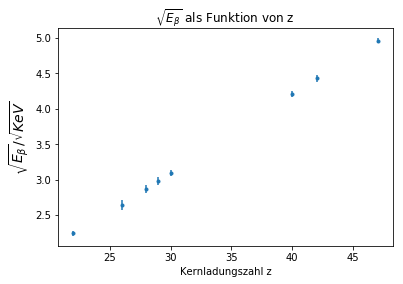

In [3]:
plt.errorbar(Z,sqrt_K_Beta,Delta_sqrt_K_Beta,fmt=".")
plt.xlabel('Kernladungszahl z')
plt.ylabel(r'$\sqrt{E_\beta}/\sqrt{KeV}$',fontsize=14)
plt.title(r'$\sqrt{E_\beta}$' + ' als Funktion von z')
plt.show()

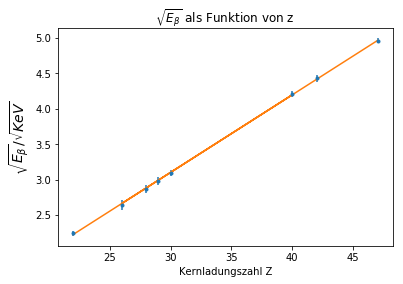

In [4]:
#sqrt_Er, sig12 sind Fitparameter
n1=1
n2=3
def fit_func(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(1/n1**2-1/n2**2)
from scipy.optimize import curve_fit
popt, pcov=curve_fit(fit_func, Z, sqrt_K_Beta, sigma=Delta_sqrt_K_Beta)
plt.errorbar(Z, sqrt_K_Beta, Delta_sqrt_K_Beta, fmt=".")
plt.xlabel('Kernladungszahl Z')
plt.ylabel(r'$\sqrt{E_\beta}/\sqrt{KeV}$',fontsize=14)
plt.title(r'$\sqrt{E_\beta}$' + ' als Funktion von z')
plt.plot(Z, fit_func(Z,*popt))
plt.show()

In [6]:
print("sqrt_Er=",popt[0], ",Standardfehler=",np.sqrt(pcov[0][0]))
print("sig12=",popt[1], ",Standardfehler=",np.sqrt(pcov[1][1]))
print("Er=", popt[0]**2, ", Stderr=", np.sqrt(pcov[0][0])*popt[0]*2)

sqrt_Er= 0.11620680894712299 ,Standardfehler= 0.0005883576859019445
sig12= 1.6929260229672807 ,Standardfehler= 0.17130840527068153
Er= 0.013504022445673143 , Stderr= 0.00013674233839635732
